In [1]:
import pymde

import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
# load the cooccurrence matrix from compressed npz file
# cooccurrence_matrix = np.load('./work/data/cooccurrence_matrix.npz')['arr_0']
# cooccurrence_matrix.shape

cooccurrence_matrix = np.load('./work/data/cooccurrence_matrix_wextra.npy')

In [3]:
import scipy.sparse as sp

# Build sparse matrix from the dense cooccurrence matrix, dropping the zero entries
cooccurrence_matrix_sparse = sp.csr_matrix(cooccurrence_matrix)
cooccurrence_graph = pymde.preprocess.Graph(cooccurrence_matrix_sparse)

In [4]:
dissimilarities = 1. / torch.log(cooccurrence_graph.weights + 1)

dissimilarity_graph = pymde.Graph.from_edges(cooccurrence_graph.edges, dissimilarities)
(dissimilarities.min(), dissimilarities.max())

(tensor(0.0512), tensor(4.4814))

In [5]:
shortest_path_graph = pymde.preprocess.graph.shortest_paths(dissimilarity_graph, verbose=True, n_workers=12)

May 04 04:20:38 AM: Computing shortest path distances (retaining 100.00 percent with max_distance=None) ...
May 04 04:20:39 AM: Graph is weighted ... using slow path.
May 04 04:21:17 AM: processed node 1/10097
May 04 04:23:23 AM: processed node 1010/10097
May 04 04:25:31 AM: processed node 2019/10097
May 04 04:27:41 AM: processed node 3028/10097
May 04 04:29:54 AM: processed node 4037/10097
May 04 04:32:09 AM: processed node 5046/10097
May 04 04:34:22 AM: processed node 6055/10097
May 04 04:36:31 AM: processed node 7064/10097
May 04 04:38:44 AM: processed node 8073/10097
May 04 04:40:57 AM: processed node 9082/10097
May 04 04:43:10 AM: processed node 10091/10097


In [21]:
n_neighbors = 100
embedding_dim = 4

mde = pymde.preserve_neighbors(shortest_path_graph, embedding_dim=embedding_dim, verbose=True, max_distance=10000, n_neighbors=n_neighbors)

May 04 07:14:46 AM: Computing 100-nearest neighbors, with max_distance=10000
May 04 07:14:53 AM: Computing quadratic initialization.


In [22]:
X = mde.embed(verbose=True,)

May 04 07:14:59 AM: Fitting a centered embedding into R^4, for a graph with 10097 items and 1958917 edges.
May 04 07:14:59 AM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
May 04 07:15:00 AM: iteration 000 | distortion 0.510366 | residual norm 0.00374979 | step length 55.05 | percent change 0.102716
May 04 07:15:03 AM: iteration 030 | distortion 0.448703 | residual norm 0.000690284 | step length 1 | percent change 1.64647
May 04 07:15:07 AM: iteration 060 | distortion 0.443620 | residual norm 0.000500656 | step length 1 | percent change 0.548892
May 04 07:15:10 AM: iteration 090 | distortion 0.440117 | residual norm 0.000613736 | step length 1 | percent change 2.75962
May 04 07:15:14 AM: iteration 120 | distortion 0.434778 | residual norm 0.000396788 | step length 1 | percent change 0.81597
May 04 07:15:18 AM: iteration 150 | distortion 0.433511 | residual norm 0.00020068 | step length 1 | percent change 1.18322
May 04 07:15:21 AM: iteration 180 | distortion 0.4

/opt/conda/lib/python3.9/site-packages/pymde/experiment_utils.py:199: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g+" (-> marker='+'). The keyword argument will take precedence.
  ax.plot(
/opt/conda/lib/python3.9/site-packages/pymde/experiment_utils.py:199: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g+" (-> color='g'). The keyword argument will take precedence.
  ax.plot(
/opt/conda/lib/python3.9/site-packages/pymde/experiment_utils.py:210: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "k+" (-> marker='+'). The keyword argument will take precedence.
  ax.plot(
/opt/conda/lib/python3.9/site-packages/pymde/experiment_utils.py:210: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k+" (-> color='k'). The keyword argument will take precedence.
  ax.plot(


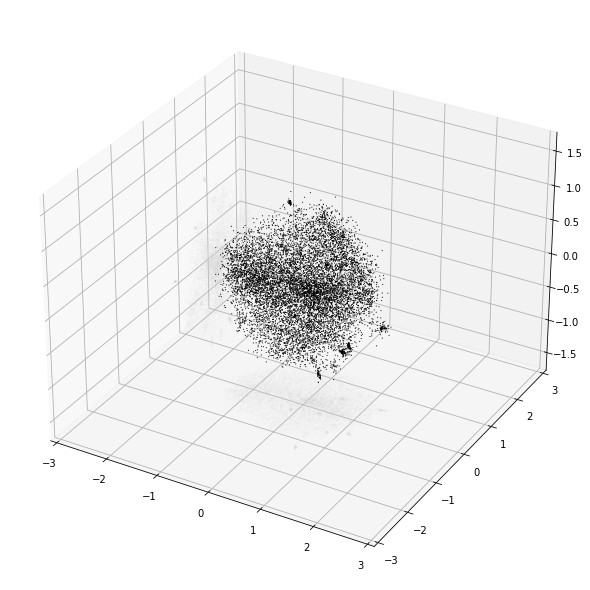

In [19]:
mde.plot(colors=['black'])
# plot from x=-3 to 3
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

In [23]:
# export in w2v format
fname = f'./work/data/pymde_{embedding_dim}d_{n_neighbors}n.w2v'
with open(fname, 'wt') as f:
    # write header
    f.write('{} {}\n'.format(len(X), mde.embedding_dim))
    for i in range(len(X)):
        row = X[i].tolist()
        f.write('{} {}\n'.format(i, ' '.join(map(str, row))))
fname

'./work/data/pymde_4d_100n.w2v'